In [19]:
import numpy as np
import pandas as pd
import yfinance as yf
import pandas_ta as ta

# Fetch the data
data = yf.download(tickers = '^GSPC', start = '2010-01-01', end = '2022-01-01')

# Calculate SMA and RSI as features
data['SMA_50'] = ta.sma(data['Close'], length=50) # small moving average (50 days)
data['RSI_14'] = ta.rsi(data['Close'], length=14) # relative strength index
data['MACD_20'] = ta.macd(data['Close'], length=20)

# Create labels: 1 if next day's close is higher than today's close, else 0
data['Next_Close'] = data['Close'].shift(-1) # Next day's close
data['Target'] = (data['Next_Close'] > data['Close']).astype(int)

# Drop rows with NaN values because of the SMA and RSI calculations
data_clean = data.dropna()
data_clean.info()


[*********************100%%**********************]  1 of 1 completed


ValueError: Cannot set a DataFrame with multiple columns to the single column MACD_20

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np

# Splitting the dataset
X = data_clean[['Close', 'SMA_50', 'RSI_14']]
y = data_clean['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Building the logistic regression model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Predicting and evaluating the model
predictions = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, predictions)

accuracy


0.5529411764705883

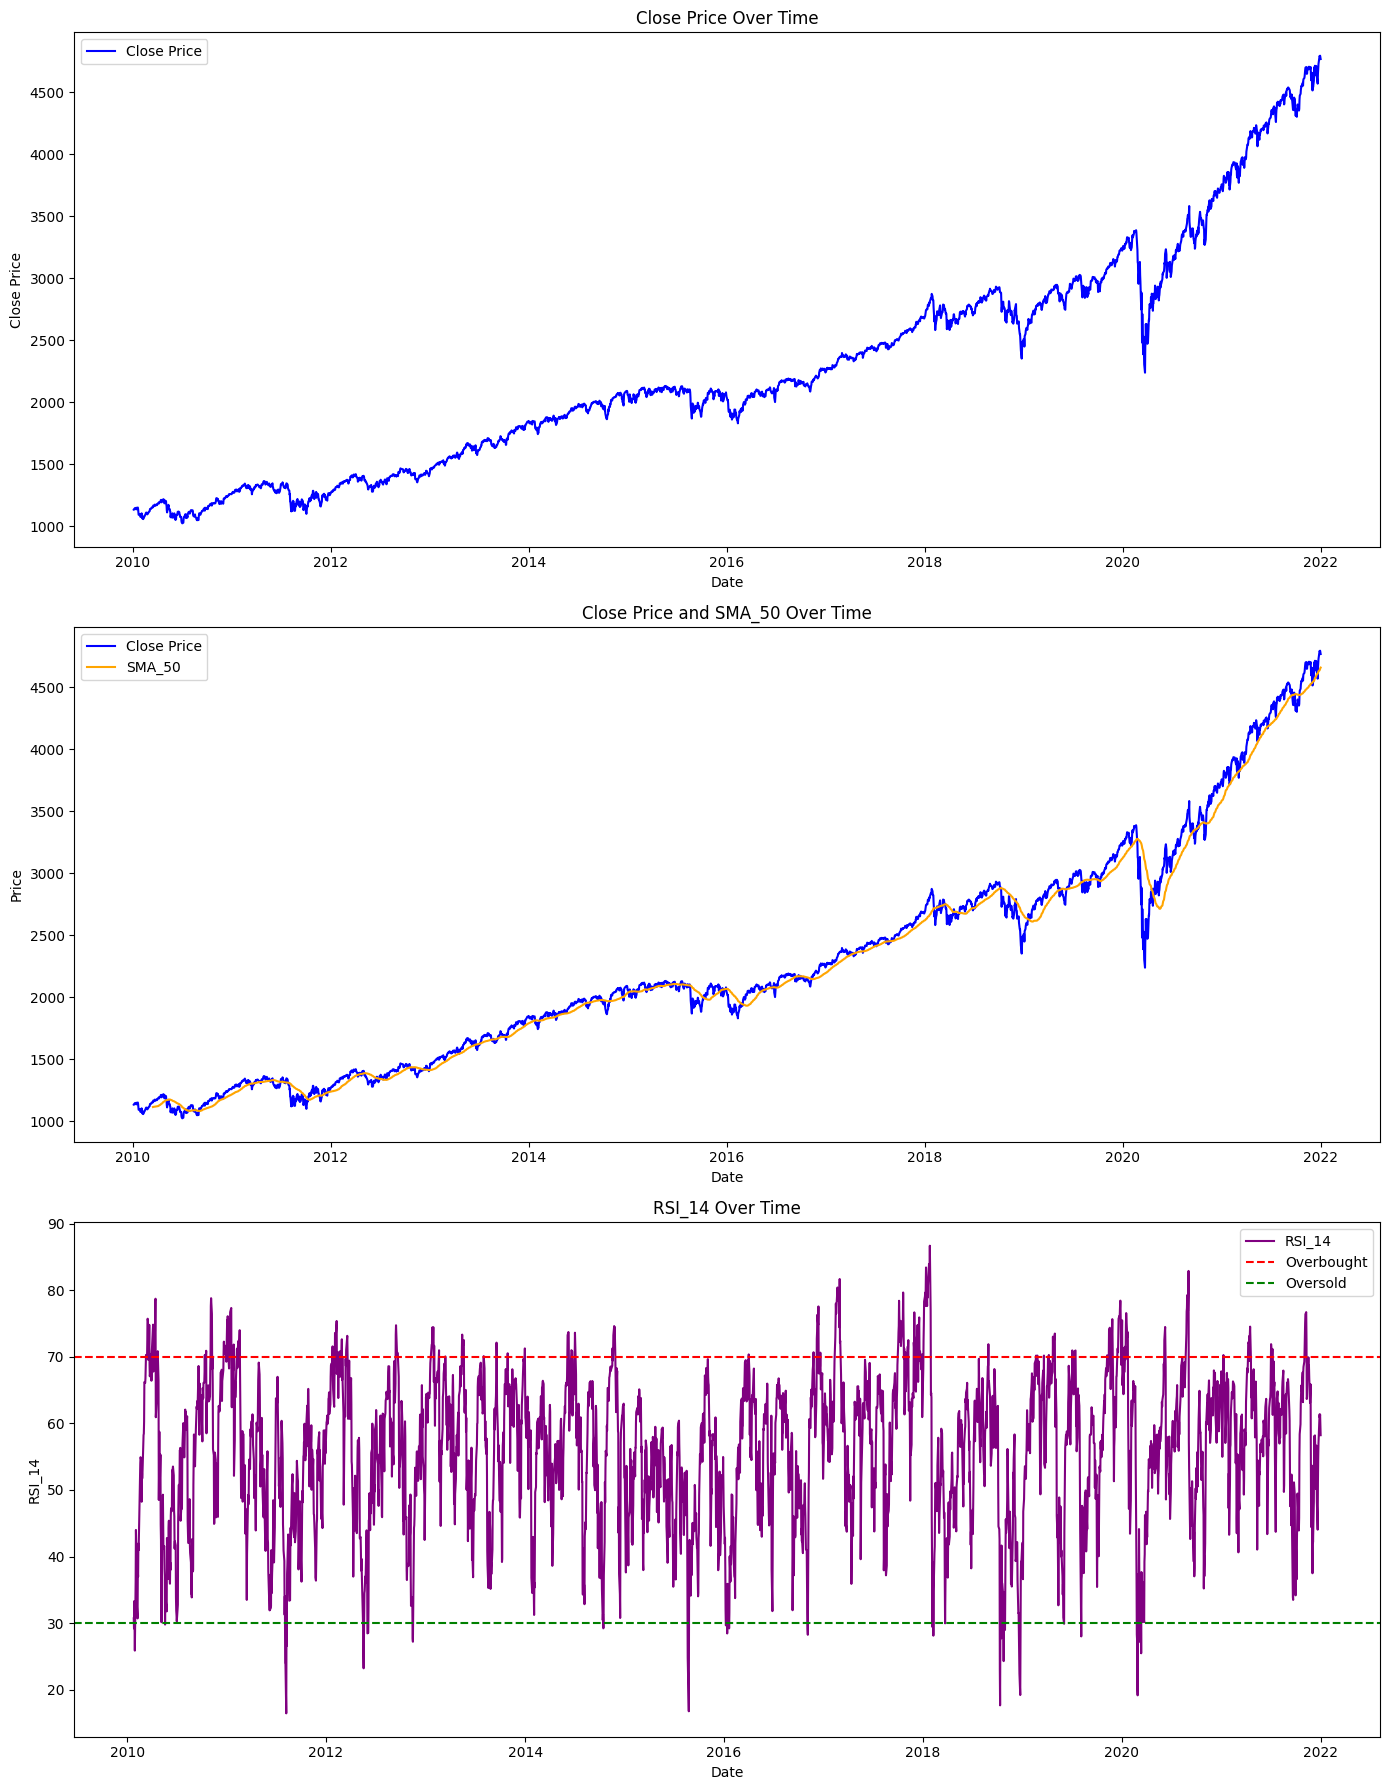

In [9]:
import matplotlib.pyplot as plt

# Plotting
fig, axs = plt.subplots(3, 1, figsize=(14, 18))

# Closing Price Over Time
axs[0].plot(data.index, data['Close'], label='Close Price', color='blue')
axs[0].set_title('Close Price Over Time')
axs[0].set_xlabel('Date')
axs[0].set_ylabel('Close Price')
axs[0].legend()

# SMA_50 and Closing Price
axs[1].plot(data.index, data['Close'], label='Close Price', color='blue')
axs[1].plot(data.index, data['SMA_50'], label='SMA_50', color='orange')
axs[1].set_title('Close Price and SMA_50 Over Time')
axs[1].set_xlabel('Date')
axs[1].set_ylabel('Price')
axs[1].legend()

# RSI_14 Over Time
axs[2].plot(data.index, data['RSI_14'], label='RSI_14', color='purple')
axs[2].set_title('RSI_14 Over Time')
axs[2].set_xlabel('Date')
axs[2].set_ylabel('RSI_14')
axs[2].axhline(70, linestyle='--', color='red', label='Overbought')
axs[2].axhline(30, linestyle='--', color='green', label='Oversold')
axs[2].legend()

plt.tight_layout()
plt.show()

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.utils import to_categorical

# Assuming X and y are already defined
def create_sequences(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        Xs.append(X[i:(i + time_steps)])
        ys.append(y[i + time_steps])
    return np.array(Xs), np.array(ys)


# Scale features
scaler = MinMaxScaler(feature_range=(0, 1))
X_scaled = scaler.fit_transform(X)

# Reshape data for LSTM
time_steps = 10
X_seq, y_seq = create_sequences(X_scaled, y, time_steps)
y_seq = to_categorical(y_seq)

# Split data into training and test sets
X_train_seq, X_test_seq = X_seq[:int(len(X_seq)*0.8)], X_seq[int(len(X_seq)*0.8):]
y_train_seq, y_test_seq = y_seq[:int(len(y_seq)*0.8)], y_seq[int(len(y_seq)*0.8):]

# Build LSTM model
model = Sequential([
    LSTM(50, activation='relu', input_shape=(time_steps, X.shape[1])),
    Dropout(0.2),
    Dense(2, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train model
model.fit(X_train_seq, y_train_seq, epochs=10, batch_size=32, validation_split=0.1, verbose=1)

# Evaluate model
test_loss, test_acc = model.evaluate(X_test_seq, y_test_seq)
print(f"Test Accuracy: {test_acc}")


C:\Users\smmcd\AppData\Local\Temp\ipykernel_9244\2732342671.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ys.append(y[i + time_steps])


Epoch 1/10
67/67 [==============================] - 3s 15ms/step - loss: 0.6903 - accuracy: 0.5429 - val_loss: 0.6961 - val_accuracy: 0.5232
Epoch 2/10
67/67 [==============================] - 0s 7ms/step - loss: 0.6899 - accuracy: 0.5458 - val_loss: 0.6977 - val_accuracy: 0.5232
Epoch 3/10
67/67 [==============================] - 1s 10ms/step - loss: 0.6903 - accuracy: 0.5458 - val_loss: 0.6955 - val_accuracy: 0.5232
Epoch 4/10
67/67 [==============================] - 0s 7ms/step - loss: 0.6893 - accuracy: 0.5458 - val_loss: 0.6977 - val_accuracy: 0.5232
Epoch 5/10
67/67 [==============================] - 1s 8ms/step - loss: 0.6892 - accuracy: 0.5458 - val_loss: 0.7019 - val_accuracy: 0.5232
Epoch 6/10
67/67 [==============================] - 0s 6ms/step - loss: 0.6897 - accuracy: 0.5458 - val_loss: 0.7000 - val_accuracy: 0.5232
Epoch 7/10
67/67 [==============================] - 1s 10ms/step - loss: 0.6893 - accuracy: 0.5458 - val_loss: 0.6986 - val_accuracy: 0.5232
Epoch 8/10
67/67 

Lucian wants us to predicting magitude of the price. Care more when its high, less when its low

C:\Users\smmcd\AppData\Local\Temp\ipykernel_9244\2466003427.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ys.append(y[i + time_steps])


Epoch 1/10
67/67 [==============================] - 4s 15ms/step - loss: 0.6908 - accuracy: 0.5378 - val_loss: 0.6970 - val_accuracy: 0.5232
Epoch 2/10
67/67 [==============================] - 1s 14ms/step - loss: 0.6897 - accuracy: 0.5458 - val_loss: 0.6977 - val_accuracy: 0.5232
Epoch 3/10
67/67 [==============================] - 1s 10ms/step - loss: 0.6898 - accuracy: 0.5458 - val_loss: 0.6973 - val_accuracy: 0.5232
Epoch 4/10
67/67 [==============================] - 1s 12ms/step - loss: 0.6892 - accuracy: 0.5458 - val_loss: 0.6974 - val_accuracy: 0.5232
Epoch 5/10
67/67 [==============================] - 0s 7ms/step - loss: 0.6893 - accuracy: 0.5458 - val_loss: 0.6963 - val_accuracy: 0.5232
Epoch 6/10
67/67 [==============================] - 0s 7ms/step - loss: 0.6894 - accuracy: 0.5458 - val_loss: 0.6980 - val_accuracy: 0.5232
Epoch 7/10
67/67 [==============================] - 0s 6ms/step - loss: 0.6894 - accuracy: 0.5458 - val_loss: 0.6976 - val_accuracy: 0.5232
Epoch 8/10
67/67

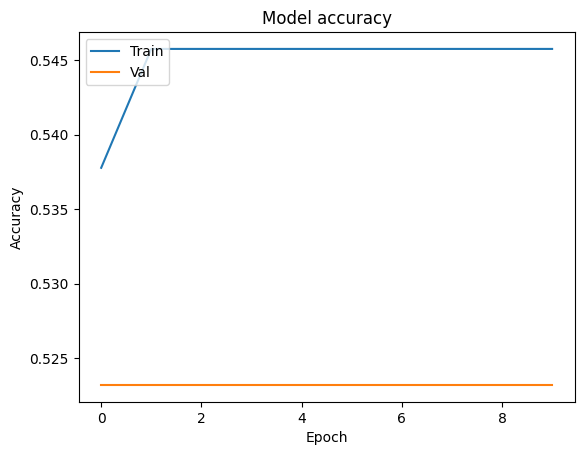

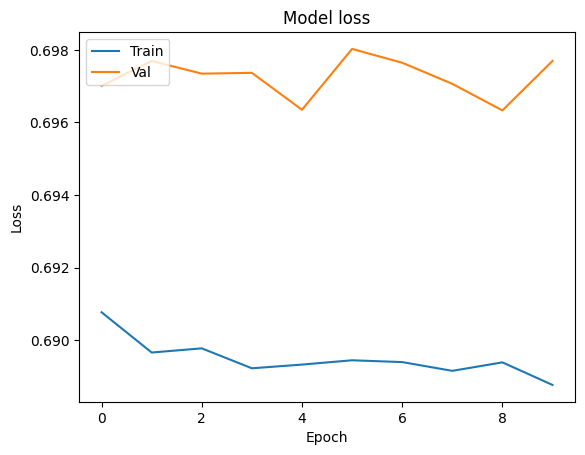

19/19 [==============================] - 0s 4ms/step - loss: 0.6836 - accuracy: 0.5784
Test Accuracy: 0.5784148573875427


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.utils import to_categorical

# Assuming X and y are already defined
def create_sequences(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        Xs.append(X[i:(i + time_steps)])
        ys.append(y[i + time_steps])
    return np.array(Xs), np.array(ys)

# Scale features
scaler = MinMaxScaler(feature_range=(0, 1))
X_scaled = scaler.fit_transform(X)

# Reshape data for LSTM
time_steps = 10
X_seq, y_seq = create_sequences(X_scaled, y, time_steps)
y_seq = to_categorical(y_seq)

# Split data into training and test sets
X_train_seq, X_test_seq = X_seq[:int(len(X_seq)*0.8)], X_seq[int(len(X_seq)*0.8):]
y_train_seq, y_test_seq = y_seq[:int(len(y_seq)*0.8)], y_seq[int(len(y_seq)*0.8):]

# Build LSTM model
model = Sequential([
    LSTM(50, activation='relu', input_shape=(time_steps, X.shape[1])),
    Dropout(0.2),
    Dense(2, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train model
history = model.fit(X_train_seq, y_train_seq, epochs=10, batch_size=32, validation_split=0.1, verbose=1)

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Evaluate model
test_loss, test_acc = model.evaluate(X_test_seq, y_test_seq)
print(f"Test Accuracy: {test_acc}")
